LOAN PREDICTION prac

In [ ]:
import pandas as pd 
import numpy as np 
import pickle 
from sklearn.metrics import accuracy_score
train=pd.read_csv("train.csv")
import streamlit as st
st.title("WELCOME TO LOAN APPROVAL PREDICTOR🖥️")
st.info("ENTER DETAILS BELOW")

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
#filling the null values
from sklearn.impute import KNNImputer
imputer=KNNImputer()
train["Credit_History"]=imputer.fit_transform(train[["Credit_History"]])

In [4]:
print(train["Gender"].unique())
print(train["Married"].unique())
print(train["Self_Employed"].unique())
print(train["Property_Area"].unique())
print(train["Credit_History"].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
[1.         0.         0.84219858]


In [5]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
#encoding the categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train["Gender"]=le.fit_transform(train["Gender"])
train["Married"]=le.fit_transform(train["Married"])
train["Education"]=le.fit_transform(train["Education"])
train["Self_Employed"]=le.fit_transform(train["Self_Employed"])
train["Dependents"]=le.fit_transform(train["Dependents"])
train["Property_Area"]=le.fit_transform(train["Property_Area"])
train["Loan_Status"]=le.fit_transform(train["Loan_Status"])


In [7]:
married=input("ENTER MARRIAGE STATUS")
employed=input("ENTER IF SELF EMPLOYED")
history=int(input("ENTER CREDIT HISTORY"))
area=input("ENTER THE AREA OF THE PROPERTY")
L=[married,employed,history,area]
df1=pd.DataFrame(L)
df1[0]=np.where(df1[0]=="No",0,df1[0])
df1[0]=np.where(df1[0]=="Yes",1,df1[0])
df1[0]=np.where(df1[0]=="Urban",2,df1[0])
df1[0]=np.where(df1[0]=="Rural",0,df1[0])
df1[0]=np.where(df1[0]=="Semiurban",1,df1[0])
df1=df1.T
df1=np.array(df1)

In [8]:
#finding the correlation between features towards the target feature
correlation=train.corr(numeric_only = True)
correlation["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.096657
Property_Area        0.032112
Self_Employed        0.010880
Gender               0.008690
ApplicantIncome     -0.004710
Dependents          -0.007318
Loan_Amount_Term    -0.021268
LoanAmount          -0.037318
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

In [9]:
#assigning X and y
X=train.drop(columns=["Gender","Loan_ID","ApplicantIncome","Loan_Amount_Term","LoanAmount","CoapplicantIncome","Education","Dependents","Loan_Status"])
y=train["Loan_Status"]

In [10]:
X.columns

Index(['Married', 'Self_Employed', 'Credit_History', 'Property_Area'], dtype='object')

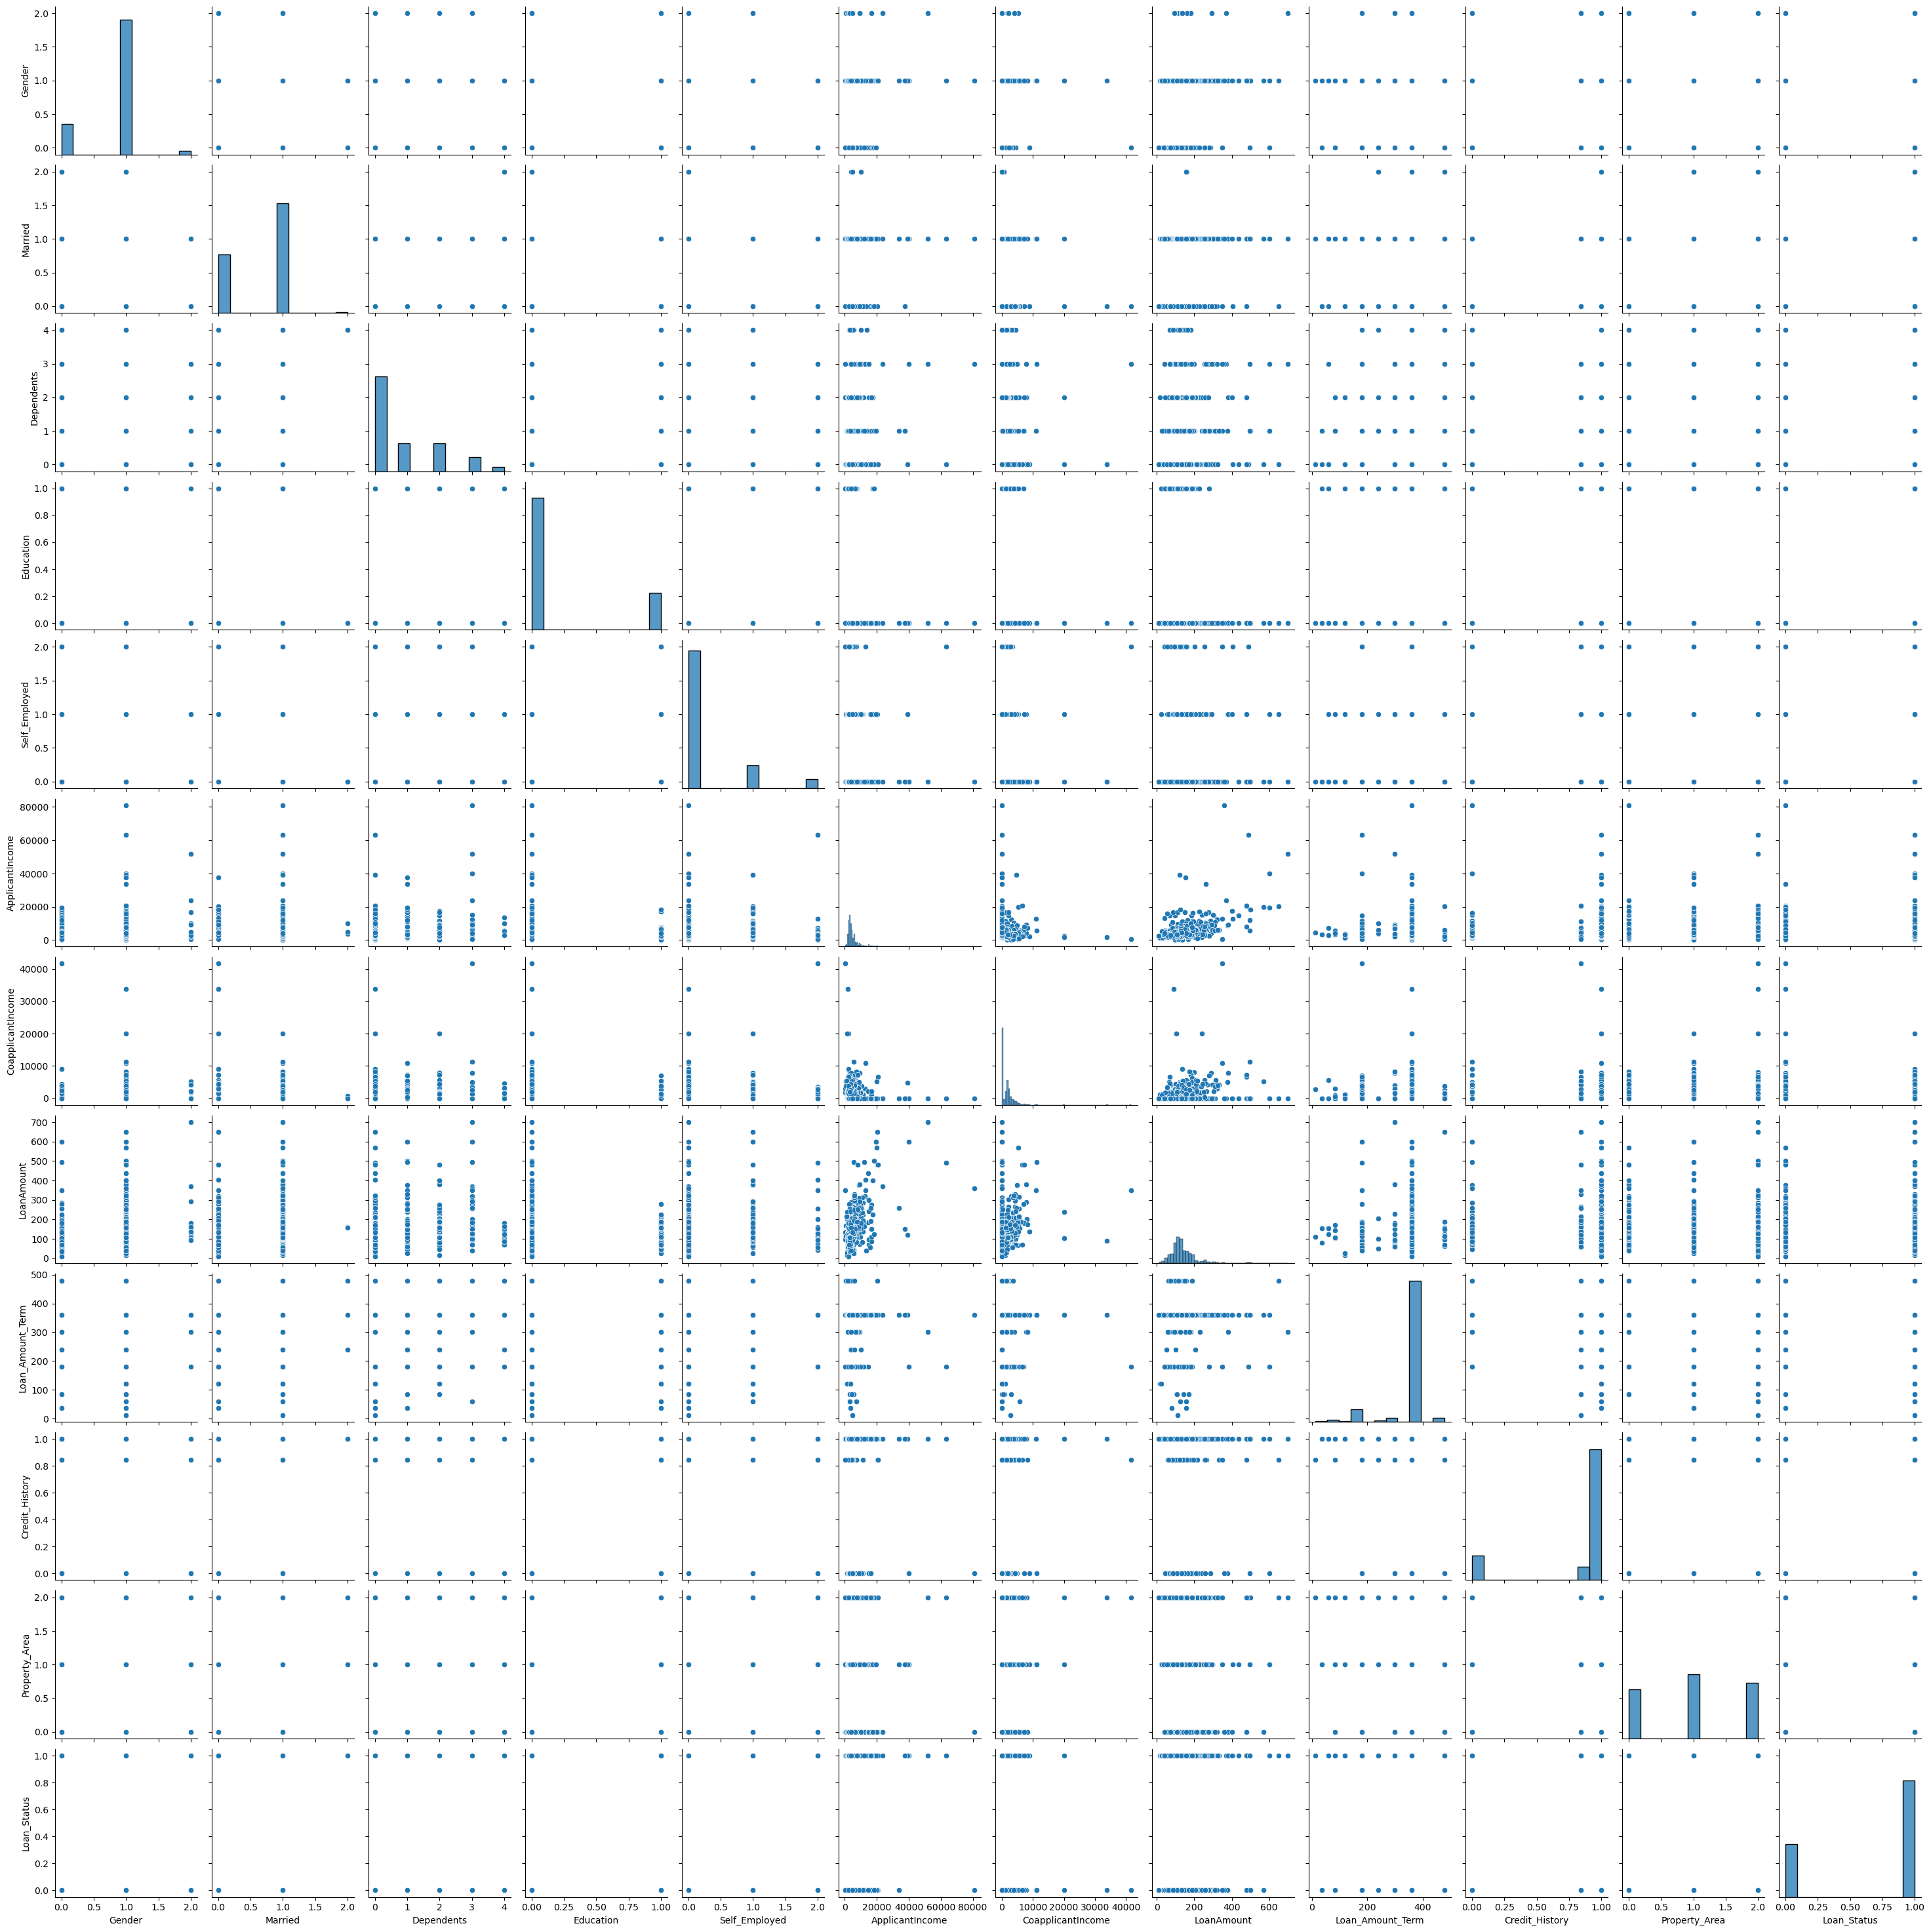

In [11]:
import seaborn as sns 
sns.pairplot(train)

In [23]:
#Train test splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [24]:
X_test.shape

(123, 4)

In [25]:
#scaling of numerical features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

USING OPTUNA

In [26]:
import optuna

In [27]:
#OPTUNA CONFIG FOR RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
def objective(trail,data=X,target=y):
    param={
        "n_estimators":300,
        "max_depth":trail.suggest_categorical("max_depth",[3,4,5,6,7,8,9,10,11,12]),
        "min_samples_split":trail.suggest_categorical("min_samples_split",[2,3,4,5,6,8,9,10]),
        "min_samples_leaf":trail.suggest_categorical("min_samples_leaf",[3,4,5,6,7,8,9,11,12]),
        "criterion":trail.suggest_categorical("criterion",['gini', 'log_loss', 'entropy'])
    }
    rforest=RandomForestClassifier(**param)
    rforest.fit(X_train,y_train)
    y_pred=rforest.predict(X_test)
    return accuracy_score(y_test,y_pred)


In [28]:
find_param=optuna.create_study()
find_param.optimize(objective,n_trials=5)

[I 2024-06-08 17:04:38,684] A new study created in memory with name: no-name-8e29fec2-90a1-46d8-b7c7-425e825a5258
[I 2024-06-08 17:04:39,704] Trial 0 finished with value: 0.8292682926829268 and parameters: {'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 11, 'criterion': 'gini'}. Best is trial 0 with value: 0.8292682926829268.
[I 2024-06-08 17:04:40,631] Trial 1 finished with value: 0.8292682926829268 and parameters: {'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 5, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8292682926829268.
[I 2024-06-08 17:04:41,640] Trial 2 finished with value: 0.8292682926829268 and parameters: {'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 12, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8292682926829268.
[I 2024-06-08 17:04:42,636] Trial 3 finished with value: 0.8292682926829268 and parameters: {'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 12, 'criterion': 'log_loss'}. Best is trial 0 

In [29]:
params=find_param.best_trial.params
Rforest=RandomForestClassifier(**params)
Rforest.fit(X_train,y_train)
print(f"Training score for random forest classifier: {Rforest.score(X_train,y_train)}")
y_pred=Rforest.predict(df1)
if y_pred==1:
    print("LOAN APPROVED")
else:
    print("LOAN DISAPPROVED")


Training score for random forest classifier: 0.8044806517311609
LOAN APPROVED


In [30]:
#OPTUNA CONFIG FOR GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
def objective(trail,data=X,target=y):
    param={
        "criterion":trail.suggest_categorical("criterion",["friedman_mse", "squared_error"]),
        "n_estimators":300,
        "max_depth":trail.suggest_categorical("max_depth",[3,4,5,6,7,8,9,10,11,12]),
        "min_samples_split":trail.suggest_categorical("min_samples_split",[2,3,4,5,6,8,9,10]),
        "min_samples_leaf":trail.suggest_categorical("min_samples_leaf",[3,4,5,6,7,8,9,11,12]),
    }
    gb=GradientBoostingClassifier(**param)
    gb.fit(X_train,y_train)
    y_pred=gb.predict(X_test)
    return accuracy_score(y_test,y_pred)
    

In [31]:
best_param=optuna.create_study()
best_param.optimize(objective,n_trials=5)

[I 2024-06-08 17:04:46,050] A new study created in memory with name: no-name-9b6076fd-fe55-47e0-ad55-7d6378e8940e
[I 2024-06-08 17:04:46,858] Trial 0 finished with value: 0.8211382113821138 and parameters: {'criterion': 'squared_error', 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.8211382113821138.
[I 2024-06-08 17:04:47,435] Trial 1 finished with value: 0.8292682926829268 and parameters: {'criterion': 'friedman_mse', 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8211382113821138.
[I 2024-06-08 17:04:48,156] Trial 2 finished with value: 0.8211382113821138 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.8211382113821138.
[I 2024-06-08 17:04:48,982] Trial 3 finished with value: 0.8292682926829268 and parameters: {'criterion': 'friedman_mse', 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf

In [32]:
params=best_param.best_trial.params
gb=GradientBoostingClassifier(**params)
gb.fit(X_train,y_train)
print(f"Training score for Gradient boosting classifier: {gb.score(X_train,y_train)}")
y_pred=gb.predict(df1)
if y_pred==1:
    print("LOAN APPROVED")
    st.markdown("LOAN APPROVED")
else:
    print("LOAN DISAPPROVED")
    st.markdown("LOAN DISAPPROVED")


Training score for Gradient boosting classifier: 0.814663951120163
LOAN APPROVED


In [33]:
pickle.dump(gb, open('model.sav', 'wb')) 

In [34]:
#OPTUNA CONFIG FOR ADABOOSTING
from sklearn.ensemble import AdaBoostClassifier
def objective(trail,data=X,target=y):
    param={
        "learning_rate":trail.suggest_categorical("learning_rate",[.00001,.0003,.008,.02,.01,1,8]),
        "n_estimators":300,
    }
    gb=GradientBoostingClassifier(**param)
    gb.fit(X_train,y_train)
    y_pred=gb.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [35]:
best_param=optuna.create_study()
best_param.optimize(objective,n_trials=5)

[I 2024-06-08 17:04:50,084] A new study created in memory with name: no-name-e11db2c6-f4a3-42df-8943-a1bc1b1d89b2
[I 2024-06-08 17:04:50,574] Trial 0 finished with value: 0.8292682926829268 and parameters: {'learning_rate': 1}. Best is trial 0 with value: 0.8292682926829268.
[I 2024-06-08 17:04:51,063] Trial 1 finished with value: 0.8292682926829268 and parameters: {'learning_rate': 0.008}. Best is trial 0 with value: 0.8292682926829268.
[I 2024-06-08 17:04:51,608] Trial 2 finished with value: 0.7154471544715447 and parameters: {'learning_rate': 0.0003}. Best is trial 2 with value: 0.7154471544715447.
[I 2024-06-08 17:04:52,099] Trial 3 finished with value: 0.8292682926829268 and parameters: {'learning_rate': 0.008}. Best is trial 2 with value: 0.7154471544715447.
[I 2024-06-08 17:04:52,607] Trial 4 finished with value: 0.8292682926829268 and parameters: {'learning_rate': 0.008}. Best is trial 2 with value: 0.7154471544715447.


In [36]:
params=best_param.best_trial.params
Ada=AdaBoostClassifier(**params)
Ada.fit(X_train,y_train)
print(f"Training score for Adaboosting classifier: {Ada.score(X_train,y_train)}")
y_pred=gb.predict(X_test)
print(f"Testing score for Adaboosting classifier: {accuracy_score(y_test,y_pred)}")

Training score for Adaboosting classifier: 0.8044806517311609
Testing score for Adaboosting classifier: 0.8292682926829268


USING GRID SEARCH 

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
#for random forest classifier
Re=RandomForestClassifier()
params={
        "n_estimators":[100,200,300],
        "max_depth":[3,4,6,8],
        "min_samples_split":[2,3,4,5,6],
        "min_samples_leaf":[3,4,5,6,7,8],
        "criterion":['gini', 'log_loss', 'entropy']
    }
gridsearch_randomf=GridSearchCV(Re,param_grid=params,cv=5)
gridsearch_randomf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'log_loss', 'entropy'],
                         'max_depth': [3, 4, 6, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 300]})

In [22]:
randomforest_mod1=gridsearch_randomf.best_estimator_
randomforest_mod1.fit(X_train,y_train)
print(f"Training score for random forest classifier: {randomforest_mod1.score(X_train,y_train)}")
y_pred=randomforest_mod1.predict(X_test)
print(f"Testing score for random forest classifier: {accuracy_score(y_test,y_pred)}")

Training score for random forest classifier: 1.0
Testing score for random forest classifier: 1.0


In [45]:
#for gradient boosting
GB=GradientBoostingClassifier()
params={
    "n_estimators":[100,200,300],
        "max_depth":[3,4,5,6,7,8],
        "min_samples_split":[2,3,4,5,6],
        "min_samples_leaf":[3,4,5,6,7,8],
        "criterion":["friedman_mse", "squared_error"]
}
gridsearch_gradboost=GridSearchCV(GB,param_grid=params,cv=5)
gridsearch_gradboost.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 300]})

In [46]:
gradboost_mod1=gridsearch_gradboost.best_estimator_
gradboost_mod1.fit(X_train,y_train)
print(f"Training score for random forest classifier: {gradboost_mod1.score(X_train,y_train)}")
y_pred=gradboost_mod1.predict(X_test)
print(f"Testing score for random forest classifier: {accuracy_score(y_test,y_pred)}")

Training score for random forest classifier: 1.0
Testing score for random forest classifier: 1.0


In [47]:
#for Adaboosting 
ada=AdaBoostClassifier()
params={
    "n_estimators":[100,200,300],
    "learning_rate":[.00001,.0003,.008,.02,.01,1,8],

}
gridsearch_adab=GridSearchCV(ada,param_grid=params,cv=5)
gridsearch_adab.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1e-05, 0.0003, 0.008, 0.02, 0.01, 1,
                                           8],
                         'n_estimators': [100, 200, 300]})

In [48]:
adaboost_mod1=gridsearch_adab.best_estimator_
adaboost_mod1.fit(X_train,y_train)
print(f"Training score for Adaboost classifier: {adaboost_mod1.score(X_train,y_train)}")
y_pred=adaboost_mod1.predict(X_test)
print(f"Testing score for Adaboost classifier: {accuracy_score(y_test,y_pred)}")

Training score for Adaboost classifier: 1.0
Testing score for Adaboost classifier: 1.0
